The instructions and data for the project are provided by DataCamp.

The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [15]:
# Load the required libraries.
import pandas as pd
import seaborn as sns
import numpy as np

# Load data.
nobel_df = pd.read_csv('nobel.csv')

# Inspect data.
print(nobel_df.head())


   year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  laureate_id  \
0  "in recognition of the extraordinary services ...         1/1          160   
1  "in special recognition of his poetic composit...         1/1          569   
2  "for his work on serum therapy, especially its...         1/1          293   
3                                                NaN         1/2          462   
4                                                NaN         1/2          463   

  laureate_type                     full_name  birth_date         birth_city  \
0    I

In [16]:
print(nobel_df.dtypes)

year                     int64
category                object
prize                   object
motivation              object
prize_share             object
laureate_id              int64
laureate_type           object
full_name               object
birth_date              object
birth_city              object
birth_country           object
sex                     object
organization_name       object
organization_city       object
organization_country    object
death_date              object
death_city              object
death_country           object
dtype: object


What is the most commonly awarded gender and birth country?

Store your answers as string variables top_gender and top_country.

In [17]:
# Find the most commonly awarded gender.
print(nobel_df['sex'].value_counts())
top_gender = nobel_df['sex'].value_counts().index[0]
print()
print('The most commonly awarded gender is:', top_gender)

# Find the most commonly awarded birth country.
print(nobel_df['birth_country'].value_counts())
top_country = nobel_df['birth_country'].value_counts().index[0]
print()
print('The most commonly awarded birth country is:', top_country)

sex
Male      905
Female     65
Name: count, dtype: int64

The most commonly awarded gender is: Male
birth_country
United States of America                        291
United Kingdom                                   91
Germany                                          67
France                                           58
Sweden                                           30
                                               ... 
Austria-Hungary (Ukraine)                         1
Ottoman Empire (Turkey)                           1
Russian Empire (Azerbaijan)                       1
Bosnia (Bosnia and Herzegovina)                   1
French protectorate of Tunisia (now Tunisia)      1
Name: count, Length: 129, dtype: int64

The most commonly awarded birth country is: United States of America


Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

Store this as an integer called max_decade_usa.

The data is for the period 1901 to 2023.
    decade  born_USA
0     1900  0.017544
1     1910  0.075000
2     1920  0.074074
3     1930  0.250000
4     1940  0.302326
5     1950  0.291667
6     1960  0.265823
7     1970  0.317308
8     1980  0.319588
9     1990  0.403846
10    2000  0.422764
11    2010  0.314050
12    2020  0.360000


c:\Users\tkirov\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tkirov\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


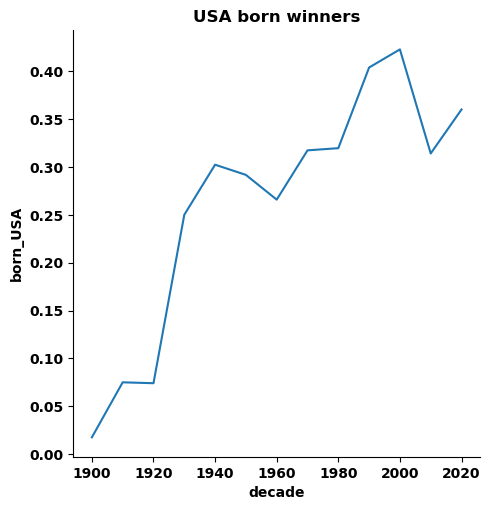

In [18]:

print('The data is for the period', str(nobel_df['year'].min()), 'to', str(nobel_df['year'].max()) + '.')

# Create an additional column that is for winners born in the USA.
nobel_df['born_USA'] = nobel_df['birth_country'] == 'United States of America'

# Create an additional column to identify the decade based on nobel_df['year']
# np.floor returns the floor of the elements of array. The floor of the scalar x is the largest integer i, such that i <= x.
nobel_df['decade'] = (np.floor(nobel_df['year']//10 *10)).astype(int)

# Calculate the proportion of USA born winners for each decade.
# Use as_index in groupby() operation to specify whether or not the column that we grouped by to be used as the index of the output.
# We specify as_index=False so the 'decade' column will not be used as the index of the output:
proportion_usa_winners = nobel_df.groupby('decade', as_index = False)['born_USA'].mean()

print(proportion_usa_winners)

# Identify the decade with the highest proportion of US-born winners
max_decade_usa = proportion_usa_winners[proportion_usa_winners['born_USA'] == proportion_usa_winners['born_USA'].max()]['decade'].values[0]

# Optional: Plotting USA born winners
ax1 = sns.relplot(x='decade', y='born_USA', data=proportion_usa_winners, kind="line")
ax1.set(title = 'USA born winners')

Which decade and Nobel Prize category combination had the highest proportion of female laureates?

Store this as a dictionary called max_female_dict where the decade is the key and the category is the value. There should only be one key:value pair.

    decade    category  female_winners
0     1900   Chemistry        0.000000
1     1900  Literature        0.100000
2     1900    Medicine        0.000000
3     1900       Peace        0.071429
4     1900     Physics        0.076923
..     ...         ...             ...
67    2020   Economics        0.111111
68    2020  Literature        0.500000
69    2020    Medicine        0.125000
70    2020       Peace        0.285714
71    2020     Physics        0.166667

[72 rows x 3 columns]
The decade with the most female winners is 2020 and the category is Literature


c:\Users\tkirov\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\tkirov\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


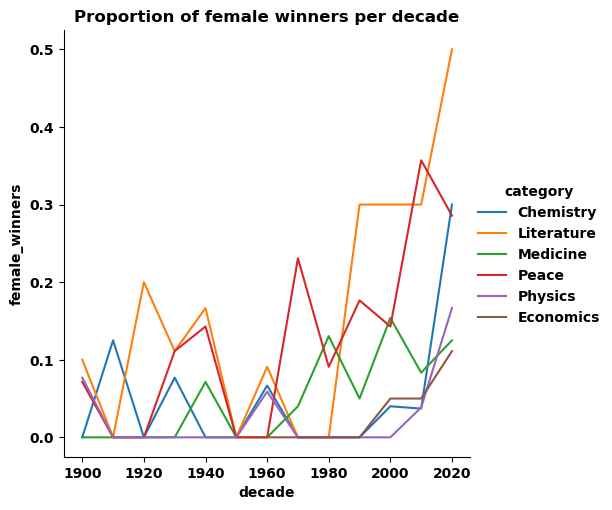

In [19]:
# Create an additional column that is for winners born in the USA.
nobel_df['female_winners'] = nobel_df['sex'] == 'Female'

# Calculate the proportion of female winners per decade.
proportion_female_winners = nobel_df.groupby(['decade', 'category'], as_index = False)['female_winners'].mean()
print(proportion_female_winners)

# Find the decade and category with the highest proportion of female winners.
decade_max_proportion_female = proportion_female_winners[proportion_female_winners['female_winners'] == proportion_female_winners['female_winners'].max()]['decade'].values[0]
category_max_proportion_female = proportion_female_winners[proportion_female_winners['female_winners'] == proportion_female_winners['female_winners'].max()]['category'].values[0]

# Create a dictionary with the decade and category pair.
print('The decade with the most female winners is', decade_max_proportion_female, 'and the category is', category_max_proportion_female)
max_female_dict = {decade_max_proportion_female: category_max_proportion_female}

# Plot female winners with % winners on the y-axis
ax2 = sns.relplot(x='decade', y='female_winners', hue='category', data=proportion_female_winners, kind="line")
ax2.set(title = 'Proportion of female winners per decade')

Who was the first woman to receive a Nobel Prize, and in what category?

Save your string answers as first_woman_name and first_woman_category.

In [20]:
# Filter the DataFrame for the rows with Female winners.
female_winners_df = nobel_df[nobel_df['female_winners']]
# print(female_winners_df.head())

# Find the earliest year and corresponding category in this subset.
min_row = female_winners_df[female_winners_df['year'] == female_winners_df['year'].min()]
first_woman_name = min_row['full_name'].values[0]
first_woman_category = min_row['category'].values[0]
print(f"\n The first woman to win a Nobel Prize was {first_woman_name}, in the category of {first_woman_category}.")


 The first woman to win a Nobel Prize was Marie Curie, née Sklodowska, in the category of Physics.


Which individuals or organizations have won more than one Nobel Prize throughout the years?

Store the full names in a list named repeat_list.

In [21]:
# Select the winners with two or more prizes.
full_name_counts = nobel_df['full_name'].value_counts()
# print(full_name_counts)

# Save the full names of the winners with more than two prizes as a list called repeats.
repeats = full_name_counts[full_name_counts >= 2].index
print(repeats)

repeat_list = list(repeats)

print('The winners with more than two prizes are:', repeat_list)

Index(['Comité international de la Croix Rouge (International Committee of the Red Cross)',
       'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger',
       'Marie Curie, née Sklodowska',
       'Office of the United Nations High Commissioner for Refugees (UNHCR)'],
      dtype='object', name='full_name')
The winners with more than two prizes are: ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
